In [65]:
import requests
from bs4 import BeautifulSoup
import time
import re
import time
import os

# url_to_scrape = 'http://censusindia.gov.in/pca/cdb_pca_census/cd_block.html'
# r = requests.get(url_to_scrape)
# soup = BeautifulSoup(r.text)
# print(soup)
state_links = []
# for tag in soup.find_all("font", string="C.D. Block Wise Primary Census Abstract Data(PCA) "):
#     table = tag.parent.parent.parent
#     break

# for anchor in table.find_all(href=True):
#     state_links.append({"href": anchor['href'], "state": anchor.contents[0].strip()})

state_links = [
# {"href": "Houselisting-housing-Maha.html", "state" : "Maharashtra"}, 
#                {"href": "Houselisting-housing-Aurnachal_Pradesh.html",
#                "state": "Arunachal Pradesh"},
              {"href": "Houselisting-housing-Jamu_&kasmir.html", "state": "Jammu and Kashmir"}
              ]

base_link = "http://censusindia.gov.in/pca/cdb_pca_census/"
xlsx_links = []
for link in state_links:
    if link["href"].endswith('.html'):
        print('Fetching xlsx links from', base_link + link["href"])
        r1 = requests.get(base_link + link["href"])
        link_page = BeautifulSoup(r1.text)
        table = ""
        for tag in link_page.find_all("font", string="C.D. Block Wise Primary Census Abstract Data(PCA)"):
            table = tag.parent.parent.parent
            break
        for xlsx in table.find_all(href=True):
            print('Fetching xlsx from', base_link + xlsx["href"])
            
            filename = 'data/census/'+ link["state"] + '/' + xlsx.contents[0].strip() +'.xlsx'
            if xlsx['href'].endswith('.xlsx'):
                if not os.path.exists(os.path.dirname(filename)):
                    try:
                        os.makedirs(os.path.dirname(filename))
                    except OSError as exc: # Guard against race condition
                        if exc.errno != errno.EEXIST:
                            raise
                r1 = requests.get(base_link + xlsx["href"])
                output = open(filename, 'wb')
                output.write(r1.content)
                output.close()
        time.sleep(1)
print("Completed Fetching data")


Fetching xlsx links from http://censusindia.gov.in/pca/cdb_pca_census/Houselisting-housing-Jamu_&kasmir.html


C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0114-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0102-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0109-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0108-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0116-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0111-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0121-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0104-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0107-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0118-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0115-F-Census.xlsx

In [210]:
import xlrd
import csv

def open_file(path):
    """
    Open and read an Excel file
    """
    book = xlrd.open_workbook(path)
    first_sheet = book.sheet_by_index(0)
    first_row = first_sheet.row_values(0)
    first_row_val = first_row[0].split(";")
    state = ""
    district = ""
    if "SIKKIM" in first_row[0]:
        state = "SIKKIM"
        district = first_row[0].split("DISTRICT:")[1].strip().title()
    elif len(first_row_val) == 2:
        if "STATE:" in first_row_val[0]:
            state = first_row_val[0].split("STATE:")[1].strip().title()
        if "DISTRICT:" in first_row_val[1]:
            district = first_row_val[1].split("DISTRICT:")[1].strip().title()
        if "UNION TERRITORY:" in first_row_val[0]:
            state = first_row_val[0].split("UNION TERRITORY:")[1].strip().title()
            if district == "":
                district = state
    if state == "" or district == "":
        print(first_row_val)
        
    total_households = str(first_sheet.cell(55,4).value)
    rural_households = str(first_sheet.cell(55,7).value)
    urban_households = str(first_sheet.cell(55,10).value)
    
    total_internet_pct = str(first_sheet.cell(64,4).value)
    rural_internet_pct = str(first_sheet.cell(64,7).value)
    urban_internet_pct = str(first_sheet.cell(64,10).value)
    return [state, district, total_households, rural_households, urban_households, total_internet_pct, rural_internet_pct, urban_internet_pct]
 
if __name__ == "__main__":
    internet_penentration_per_district = [['State', 'District','Total Households', 'Rural Households', 'Urban Households', 'Total Households With Internet Pct', 'Rural Households With Internet Pct', 'Urban Households With Internet Pct']]
    for root, dirs, files in os.walk("data/niti", topdown=False):
        for name in files:
            if name.endswith(".xls") or name.endswith(".xlsx"):
    #             print(os.path.join(root, name))
                arr = open_file(os.path.join(root, name))
                internet_penentration_per_district.append(arr)
    print(len(internet_penentration_per_district))

674


In [211]:
myFile = open('data/niti/internet_penentration_per_district.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile, dialect='excel')
    writer.writerows(internet_penentration_per_district)


In [212]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

niti_df = pd.read_csv('data/niti/internet_penentration_per_district.csv', index_col=['State'])

In [213]:
niti_df.head()

,District,Total Households,Rural Households,Urban Households,Total Households With Internet Pct,Rural Households With Internet Pct,Urban Households With Internet Pct
State,,,,,,,
Andaman And Nicobar Islands,Nicobar,9959.0,9959.0,-,0.57,0.57,0.0
Andaman And Nicobar Islands,North And Middle Andaman,26327.0,25586.0,741.0,1.47,1.46,1.89
Andaman And Nicobar Islands,South Andaman (Andaman),57090.0,23485.0,33605.0,4.89,1.67,7.13
Andhra Pradesh,Anantapur,961165.0,698439.0,262726.0,0.57,0.29,1.1
Andhra Pradesh,Srikakulam,689323.0,580048.0,109275.0,0.58,0.31,2.02


In [214]:
niti_df.dtypes

District                              object
Total Households                      object
Rural Households                      object
Urban Households                      object
Total Households With Internet Pct    object
Rural Households With Internet Pct    object
Urban Households With Internet Pct    object
dtype: object

In [222]:
niti_df['Total Households'] = niti_df['Total Households'].replace('-', np.NaN)
niti_df['Total Households'] = niti_df['Total Households'].replace('Not available', np.NaN)
niti_df['Rural Households'] = niti_df['Rural Households'].replace('-', np.NaN)
niti_df['Rural Households'] = niti_df['Rural Households'].replace('Not available', np.NaN)
niti_df['Urban Households'] = niti_df['Urban Households'].replace('-', np.NaN)
niti_df['Urban Households'] = niti_df['Urban Households'].replace('Not available', np.NaN)

niti_df['Total Households With Internet Pct'] = niti_df['Total Households With Internet Pct'].replace('Not available', np.NaN)
niti_df['Rural Households With Internet Pct'] = niti_df['Rural Households With Internet Pct'].replace('Not available', np.NaN)
niti_df['Rural Households With Internet Pct'] = niti_df['Rural Households With Internet Pct'].replace('Not applicable', np.NaN)
niti_df['Urban Households With Internet Pct'] = niti_df['Urban Households With Internet Pct'].replace('Not available', np.NaN)


In [223]:
niti_df['Total Households'] = niti_df['Total Households'].astype(float)
niti_df['Rural Households'] = niti_df['Rural Households'].astype(float)
niti_df['Urban Households'] = niti_df['Urban Households'].astype(float)

niti_df['Total Households With Internet Pct'] = niti_df['Total Households With Internet Pct'].astype(float)
niti_df['Rural Households With Internet Pct'] = niti_df['Rural Households With Internet Pct'].astype(float)
niti_df['Urban Households With Internet Pct'] = niti_df['Urban Households With Internet Pct'].astype(float)

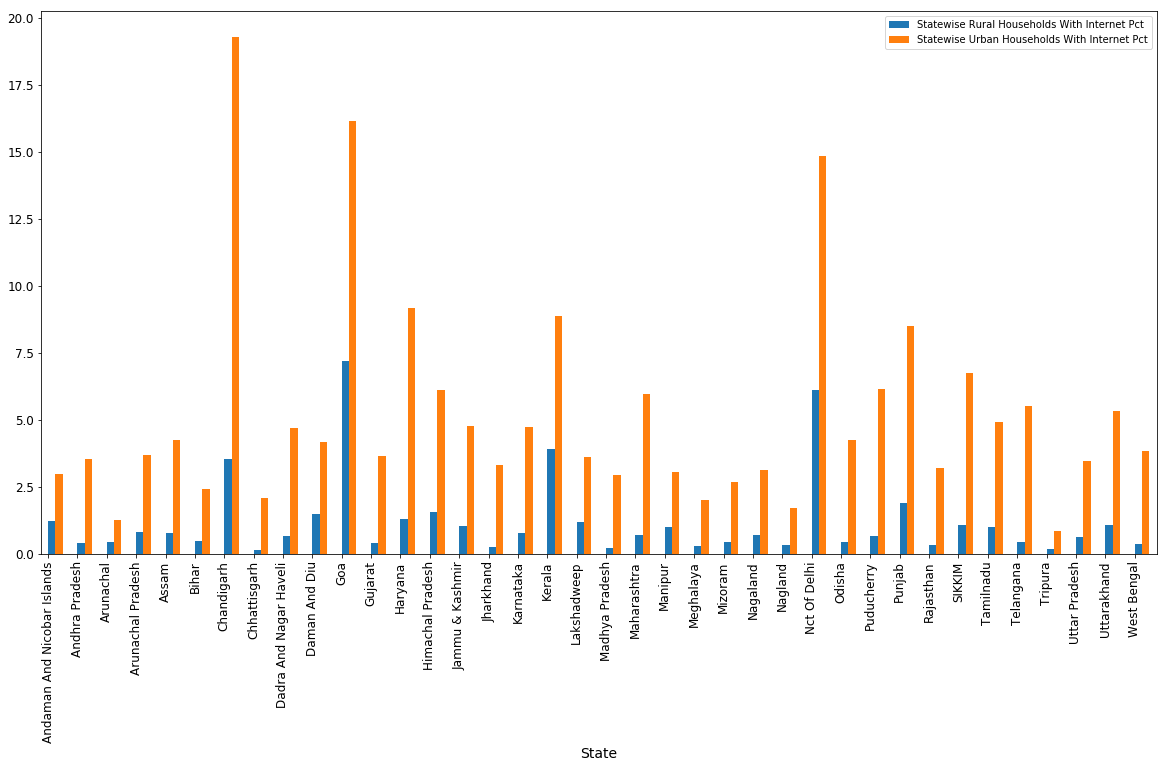

In [227]:
state_wise_cumulative = niti_df.groupby('State').agg({'Total Households': 'sum',
                                                      'Rural Households': 'sum',
                                                      'Urban Households': 'sum',
                                                      'Total Households With Internet Pct': 'sum', 
                                                      'Rural Households With Internet Pct': 'sum', 
                                                      'Urban Households With Internet Pct': 'sum', 
                                                      'District': 'count'})
state_wise_cumulative['Statewise Rural Households']  =  state_wise_cumulative['Rural Households'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Urban Households']  =  state_wise_cumulative['Urban Households'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Rural Households With Internet Pct']  =  state_wise_cumulative['Rural Households With Internet Pct'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Urban Households With Internet Pct']  =  state_wise_cumulative['Urban Households With Internet Pct'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Total Households With Internet Pct']  =  state_wise_cumulative['Total Households With Internet Pct'].divide(state_wise_cumulative['District'])
fig = plt.figure()
ax = fig.add_subplot(111)
state_wise_cumulative[['Statewise Rural Households With Internet Pct', 'Statewise Urban Households With Internet Pct']].plot.bar(figsize=(20,10), ax=ax, position=0)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.xticks(rotation=90)
plt.show()

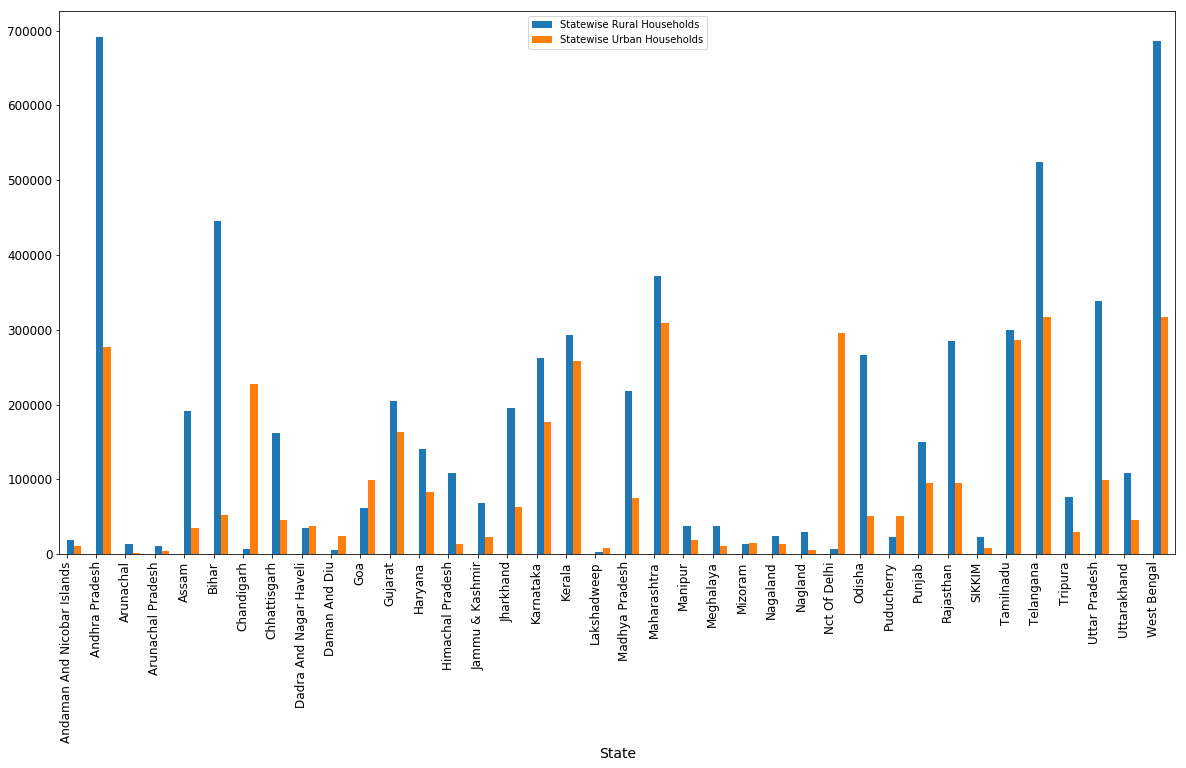

In [228]:
fig = plt.figure()
ax = fig.add_subplot(111)
state_wise_cumulative[['Statewise Rural Households', 'Statewise Urban Households']].plot.bar(figsize=(20,10), ax=ax, position=0)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.xticks(rotation=90)
plt.show()